# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tools.eval_measures import rmse
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import Axes3D

In [8]:
pd.set_option('display.max_columns', 200)
#pd.set_option('display.min_columns', 100)
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 100)

# Data

In [15]:
df=pd.read_csv("https://raw.githubusercontent.com/pvannyamelia/dsc_kuliah/main/data_science/assets_dsc/insurance.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [18]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [19]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


### Drop dulicated rows

In [20]:
dupl = list(df[df.duplicated()==True].index)
print(dupl)
print("Shape Before: ", df.shape)
df.drop(df.index[dupl], inplace=True)
print("Shape After: ", df.shape)

[581]
Shape Before:  (1338, 7)
Shape After:  (1337, 7)


In [21]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


# Removing outliers

Text(0, 0.5, 'BMI')

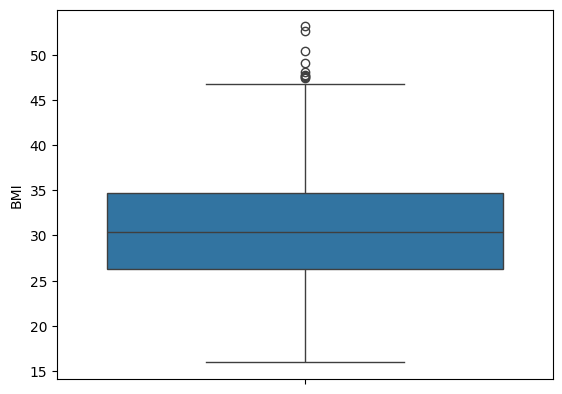

In [22]:
sns.boxplot(data=df['bmi'])
plt.ylabel('BMI')

Text(0, 0.5, 'charges')

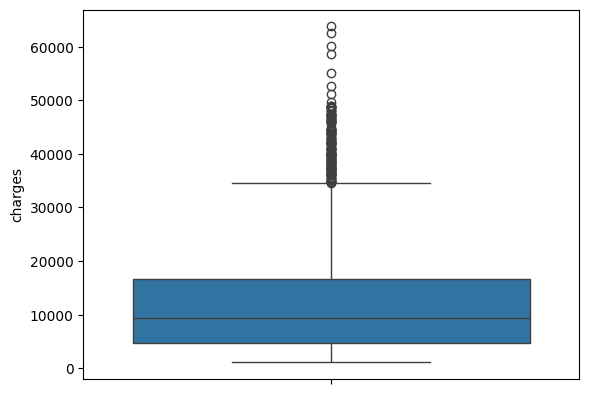

In [23]:
sns.boxplot(data=df['charges'])
plt.ylabel('charges')

## Use Z_score to remove outliers

In [32]:
df['z_bmi'] = np.abs(stats.zscore(df['bmi']))
outlBmi = list(np.where(np.abs(df['z_bmi']) > 3)[0])
print("BMI Outliers: ", outlBmi)
print("Total outlier BMI: ", len(outlBmi), "\n")

df['z_charges'] = np.abs(stats.zscore(df['charges']))
outlCharges = list(np.where(np.abs(df['z_charges']) > 3)[0])
print("Charges Outliers: ", outlCharges)
print("Total outlier Charges: ", len(outlCharges))
outl = list(set(outlBmi + outlCharges))

BMI Outliers:  [116, 846, 1046, 1316]
Total outlier BMI:  4 

Charges Outliers:  [34, 543, 577, 818, 1145, 1229, 1299]
Total outlier Charges:  7


In [33]:
df.iloc[outl, :]

,age,sex,bmi,children,smoker,region,charges,z_bmi,z_charges
577,31,0,38.095,1,1,0,58571.07448,1.218649,3.741334
34,28,1,36.400,1,1,3,51194.55914,0.940697,3.131998
1317,18,1,53.130,0,0,2,1163.46270,3.684136,1.000812
1230,52,1,34.485,3,1,1,60021.39897,0.626670,3.861138
847,23,1,50.380,1,0,2,2438.05520,3.233182,0.895524
819,33,0,35.530,0,1,1,55135.40209,0.798032,3.457531
1300,45,1,30.360,0,1,2,62592.87309,0.049761,4.073554
116,58,1,49.060,0,0,2,11381.32540,3.016724,0.156767
1047,22,1,52.580,1,1,2,44501.39820,3.593945,2.579111
1146,60,1,32.800,0,1,3,52590.82939,0.350358,3.247337


In [34]:
print(df.shape)
df.drop(df.index[list(outl)], inplace=True)
print(df.shape)

(1337, 9)
(1326, 9)


Text(0.5, 1.0, 'Correlation Between Variables')

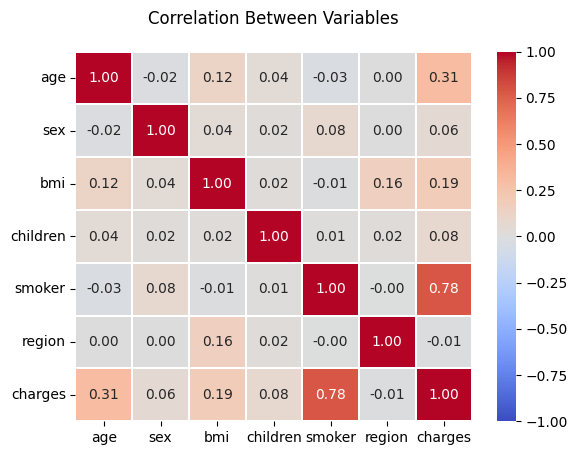

In [35]:
df = df.drop(columns=['z_bmi', 'z_charges'])
corr = df.corr()
sns.heatmap(corr, vmin=-1, vmax=1, cmap = 'coolwarm', annot=True, fmt='.2f', linewidths=0.1)
plt.title("Correlation Between Variables", pad=20)

In [36]:
df1 = df[['age', 'bmi', 'smoker', 'charges']]

C:\workspace\machine learning\code\ml\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


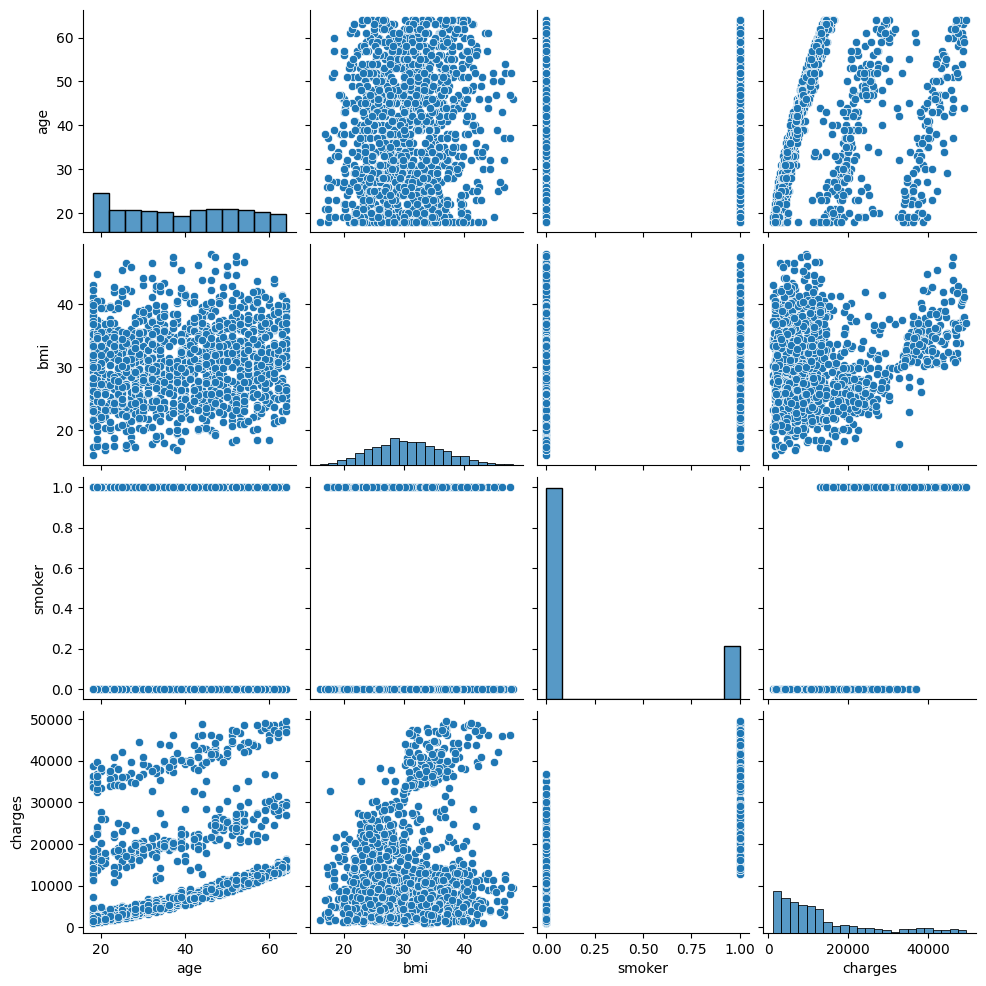

In [37]:
sns.pairplot(df1)

In [38]:
dfUsed = np.log10(df1[['age', 'charges']])
dfUsed = dfUsed.join(df1[['smoker', 'bmi']])
dfUsed = dfUsed[['age', 'bmi', 'smoker', 'charges']]

<Axes: >

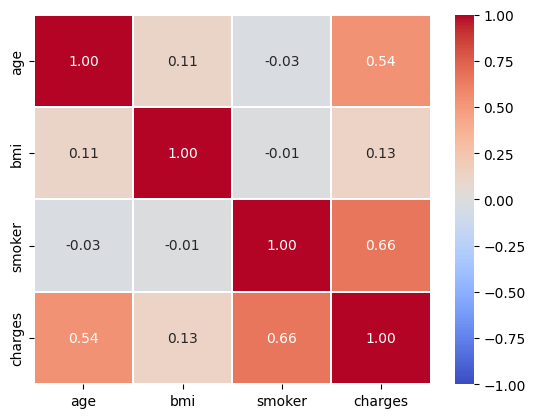

In [39]:
corr = dfUsed.corr()
sns.heatmap(corr, vmin=-1, vmax=1, cmap = 'coolwarm', annot=True, fmt='.2f', linewidths=0.1)

# Linear Regression

In [40]:
X = dfUsed.iloc[:, :-1].values
y = dfUsed.iloc[:, -1].values

In [41]:
scores=[] #to store r squared
rmse_list=[] #to store RMSE
lrmodel = LinearRegression()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    lrmodel.fit(X_train, y_train)
    y_predict = lrmodel.predict(X_test)
    scores.append(lrmodel.score(X_test, y_test))
    rmse_fold = rmse(y_test, y_predict)
    rmse_list.append(rmse_fold)

In [42]:
lm = smf.ols(formula='charges ~ age + bmi + smoker', data = dfUsed).fit()
comparison = pd.DataFrame({"y_test": y_test, "y_predict": y_predict})
print("Summary: ", lm.summary())
print("R Squared Mean: ", np.mean(scores))
print("RMSE mean: ", np.mean(rmse_list))

Summary:                              OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1302.
Date:                Sat, 23 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:55:49   Log-Likelihood:                 263.10
No. Observations:                1326   AIC:                            -518.2
Df Residuals:                    1322   BIC:                            -497.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6725      0.056     30.13

In [43]:
a = np.array([])

In [44]:
a

array([2, 3])

In [50]:
s = pd.Series([np.nan, 0, 1, np.nan, 3, np.nan, np.nan])

In [64]:
s.interpolate(limit_area = None, method = "linear")

0    NaN
1    0.0
2    1.0
3    2.0
4    3.0
5    3.0
6    3.0
dtype: float64